In [8]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import zCurve as z
import numpy as np

# Initialize

## Constants

In [9]:
LANE_CHANGE_DATA_20HZ_DIR = './data/lane_changes/20hz/'
LANE_CHANGE_DATA_10HZ_DIR = './data/lane_changes/10hz/'
LANE_CHANGE_DATA_5HZ_DIR = './data/lane_changes/5hz/'
LANE_CHANGE_HZ_DIRS = [LANE_CHANGE_DATA_20HZ_DIR, LANE_CHANGE_DATA_10HZ_DIR, LANE_CHANGE_DATA_5HZ_DIR]
OFFSET = 10
FACTOR_MULTIPLY = 10
FACTOR_MULTIPLY_LAT_LONG = 10
SAMPLING_RATE_VARIATIONS = 3 # constant to denote the amount of different sampling rates that exist

## Dataframes

In [10]:
laneChange20HzDFs = [] # Will contain the dataframes for all lane changes.
laneChange10HzDFs = [] # Will contain the dataframes for all lane changes.
laneChange5HzDFs = [] # Will contain the dataframes for all lane changes.


# Count number of files (= amt of lane changes)
numOfFiles = len([f for f in os.listdir(LANE_CHANGE_DATA_20HZ_DIR) if os.path.isfile(os.path.join(LANE_CHANGE_DATA_20HZ_DIR, f))])


# Import each csv into a dataframe
for i in range(numOfFiles):
    temp_20_df = pd.read_csv(LANE_CHANGE_DATA_20HZ_DIR + "lane_change_" + str(i+1) + ".csv", sep=";")
    temp_10_df = pd.read_csv(LANE_CHANGE_DATA_10HZ_DIR + "lane_change_" + str(i+1) + ".csv", sep=";")
    temp_5_df = pd.read_csv(LANE_CHANGE_DATA_5HZ_DIR + "lane_change_" + str(i+1) + ".csv", sep=";")
    laneChange20HzDFs.append(temp_20_df)
    laneChange10HzDFs.append(temp_10_df)
    laneChange5HzDFs.append(temp_5_df)

# Append all arrays to a single array so that
# future data processing can be done more efficiently.
laneChangeDfs = [laneChange20HzDFs, laneChange10HzDFs, laneChange5HzDFs]



In [11]:
laneChange20HzDFs[0] # test to see if a dataframe is correct.
    

,lat,lon,speed,accel_lon,accel_trans,accel_down,ts
0,57.718799,11.958346,0.116811,-0.006275,0.003880,-0.004212,1646666793703590
1,57.718799,11.958346,0.118460,-0.047546,0.064689,0.067094,1646666793753601
2,57.718799,11.958346,0.118331,0.036616,-0.010786,-0.050694,1646666793803626
3,57.718799,11.958346,0.119788,-0.102828,0.029938,0.083196,1646666793853591
4,57.718799,11.958346,0.119016,0.039307,-0.071447,-0.126803,1646666793903600
...,...,...,...,...,...,...,...
345,57.719002,11.956873,10.502030,1.272900,0.097373,0.266211,1646666810954140
346,57.719003,11.956865,10.442500,1.212828,0.109282,0.064465,1646666811004191
347,57.719005,11.956856,10.379370,1.141930,0.053132,0.029888,1646666811054149
348,57.719006,11.956848,10.317210,1.224668,0.113335,0.232543,1646666811104176


## Morton setup

In [12]:
laneChangeDfs[0][1]
for laneChanges in laneChangeDfs:
    for df in laneChanges:
        print(df)
        df['accel_lon'] = df['accel_lon'].add(OFFSET)
        df['accel_trans'] = df['accel_trans'].add(OFFSET)
        df['accel_down'] = df['accel_down'].add(OFFSET)

        df['accel_lon'] = df.apply(lambda x: int(x['accel_lon']*FACTOR_MULTIPLY) , axis=1)
        df['accel_trans'] = df.apply(lambda x: int(x['accel_trans']*FACTOR_MULTIPLY) , axis=1)
        df['accel_down'] = df.apply(lambda x: int(x['accel_down']*FACTOR_MULTIPLY) , axis=1)
        
        df['lat'] = df.apply(lambda x: int(x['lat']*FACTOR_MULTIPLY) , axis=1)
        df['lon'] = df.apply(lambda x: int(x['lon']*FACTOR_MULTIPLY) , axis=1)
        df['speed'] = df.apply(lambda x: int(x['speed']*FACTOR_MULTIPLY) , axis=1)
laneChangeDfs[0][1]


           lat        lon      speed  accel_lon  accel_trans  accel_down  \
0    57.718799  11.958346   0.116811  -0.006275     0.003880   -0.004212   
1    57.718799  11.958346   0.118460  -0.047546     0.064689    0.067094   
2    57.718799  11.958346   0.118331   0.036616    -0.010786   -0.050694   
3    57.718799  11.958346   0.119788  -0.102828     0.029938    0.083196   
4    57.718799  11.958346   0.119016   0.039307    -0.071447   -0.126803   
..         ...        ...        ...        ...          ...         ...   
345  57.719002  11.956873  10.502030   1.272900     0.097373    0.266211   
346  57.719003  11.956865  10.442500   1.212828     0.109282    0.064465   
347  57.719005  11.956856  10.379370   1.141930     0.053132    0.029888   
348  57.719006  11.956848  10.317210   1.224668     0.113335    0.232543   
349  57.719008  11.956840  10.255980   1.245987     0.201085    0.220415   

                   ts  
0    1646666793703590  
1    1646666793753601  
2    1646666793

,lat,lon,speed,accel_lon,accel_trans,accel_down,ts
0,577,119,0,96,101,104,1646666821854536
1,577,119,0,102,99,96,1646666821904556
2,577,119,0,98,99,101,1646666821954575
3,577,119,0,100,100,99,1646666822004583
4,577,119,0,99,99,99,1646666822054564
...,...,...,...,...,...,...,...
295,577,119,93,122,104,96,1646666836604996
296,577,119,92,125,103,93,1646666836655011
297,577,119,91,121,102,102,1646666836705000
298,577,119,90,122,96,104,1646666836755028


In [13]:
# convert to list.
# generate morton codes
# add to original df
#m = z.par_interlace(df_list, dims=2, bits_per_dim=18)

#def set_value(row):
   # return z.par_interlace(df_list, dims=7, bits_per_dim=18)

for laneChanges in laneChangeDfs:
    for df in laneChanges:
        tmp_frame = df[['lat', 'lon', 'speed', 'accel_lon', 'accel_trans', 'accel_down']]
        df_numpy = tmp_frame.to_numpy()
        df_list = df_numpy.tolist()
        morton_codes = z.par_interlace(df_list, dims=6, bits_per_dim=18)
        morton_frame = pd.DataFrame(morton_codes, columns=['morton'])
        df['morton'] = morton_frame['morton']
        print(df.isna().sum().sum())

laneChangeDfs[0][1]

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


,lat,lon,speed,accel_lon,accel_trans,accel_down,ts,morton
0,577,119,0,96,101,104,1646666821854536,18018515277652115
1,577,119,0,102,99,96,1646666821904556,18018515269232275
2,577,119,0,98,99,101,1646666821954575,18018515269330611
3,577,119,0,100,100,99,1646666822004583,18018515269298339
4,577,119,0,99,99,99,1646666822054564,18018515269201595
...,...,...,...,...,...,...,...,...
295,577,119,93,122,104,96,1646666836604996,18018790355788423
296,577,119,92,125,103,93,1646666836655011,18018756537345211
297,577,119,91,121,102,102,1646666836705000,18018790351777167
298,577,119,90,122,96,104,1646666836755028,18018790359966595


# CSPs

FIRST SET IS 20HZ, SECOND SET IS 10HZ, THIRD SET IS 5 HZ 
Lane change file - 1: 


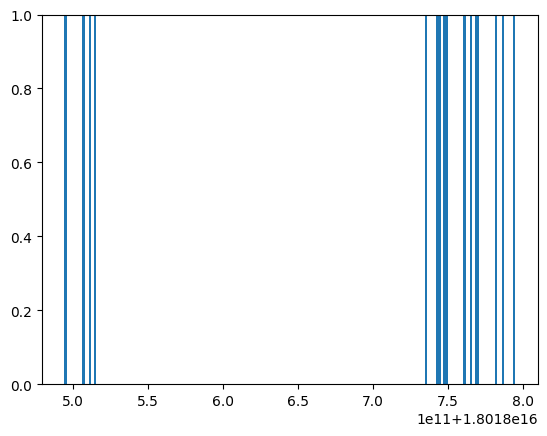

-----------------------------
Lane change file - 2: 


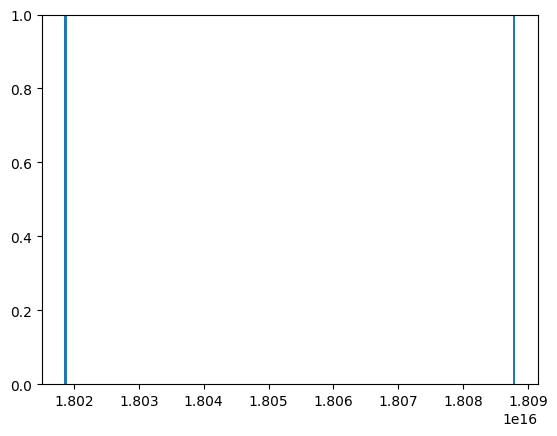

-----------------------------
Lane change file - 3: 


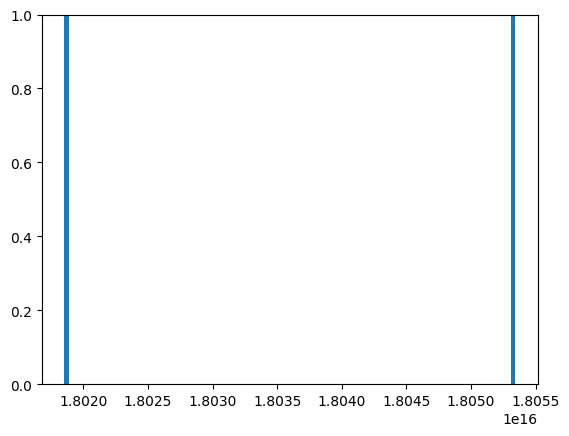

-----------------------------
Lane change file - 4: 


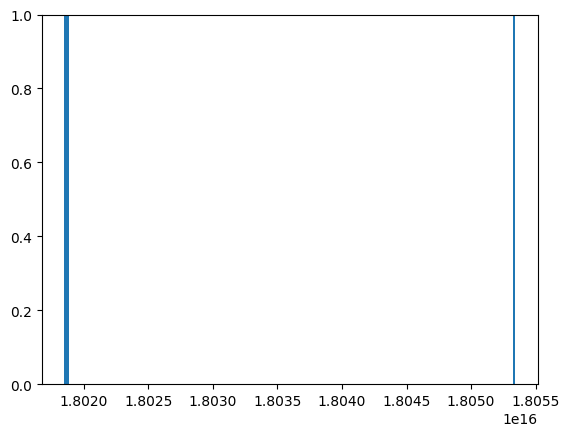

-----------------------------
Lane change file - 5: 


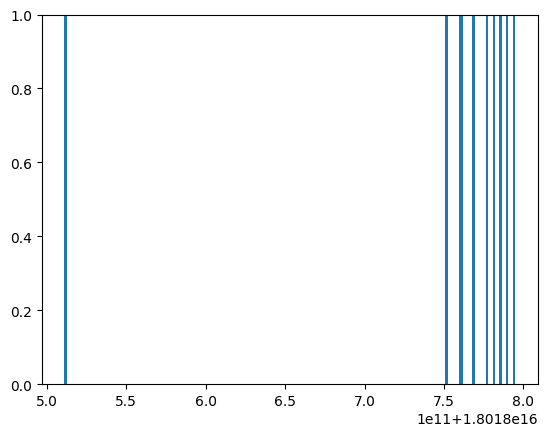

-----------------------------
Lane change file - 6: 


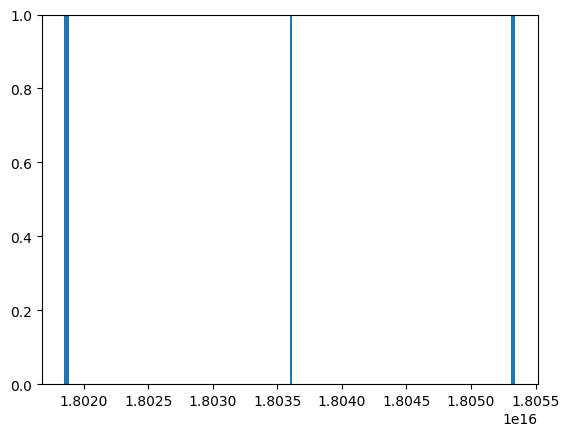

-----------------------------
Lane change file - 7: 


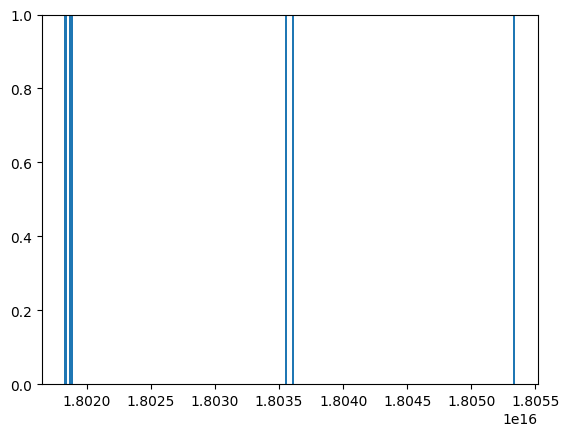

-----------------------------
Lane change file - 8: 


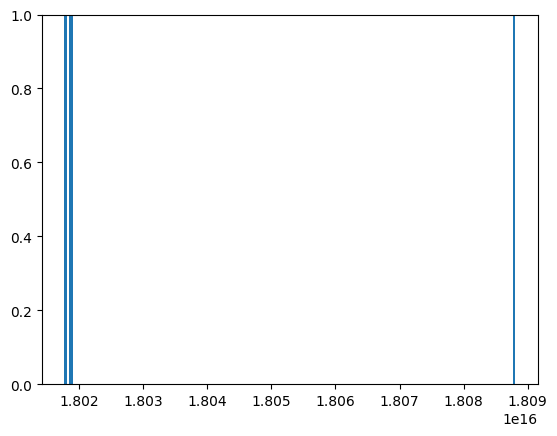

-----------------------------
Lane change file - 9: 


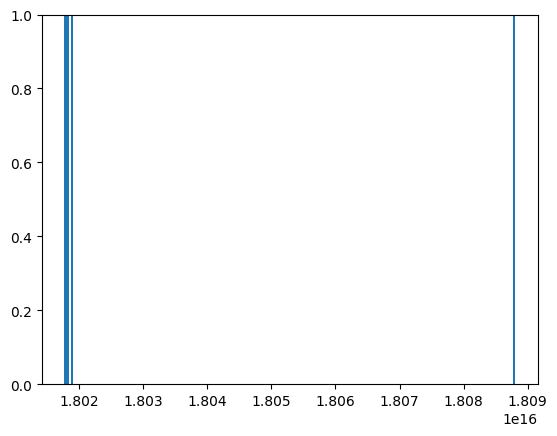

-----------------------------
Lane change file - 1: 


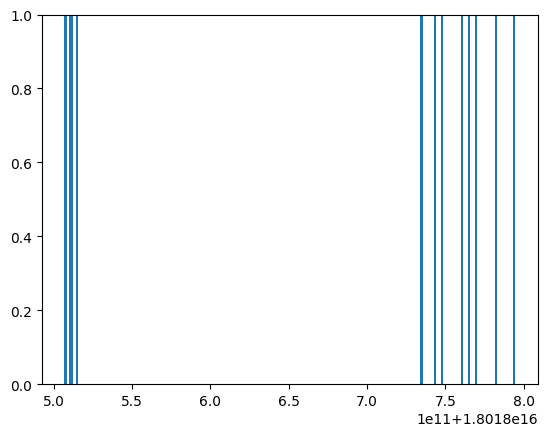

-----------------------------
Lane change file - 2: 


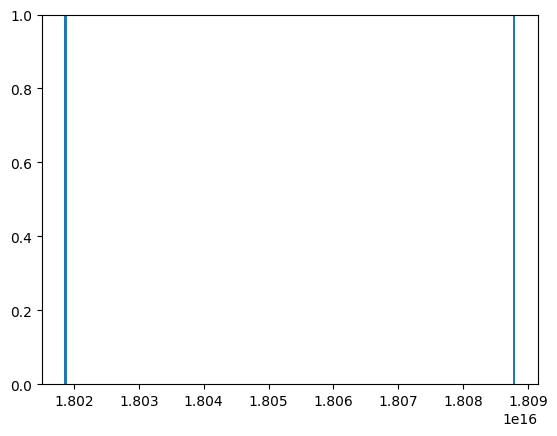

-----------------------------
Lane change file - 3: 


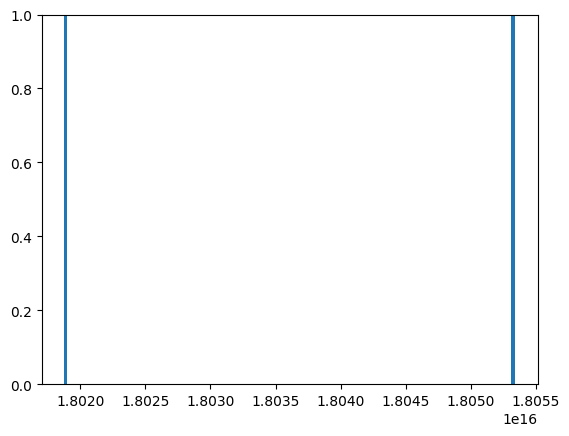

-----------------------------
Lane change file - 4: 


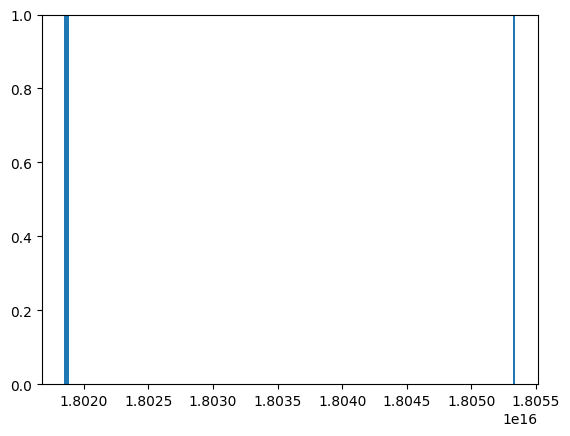

-----------------------------
Lane change file - 5: 


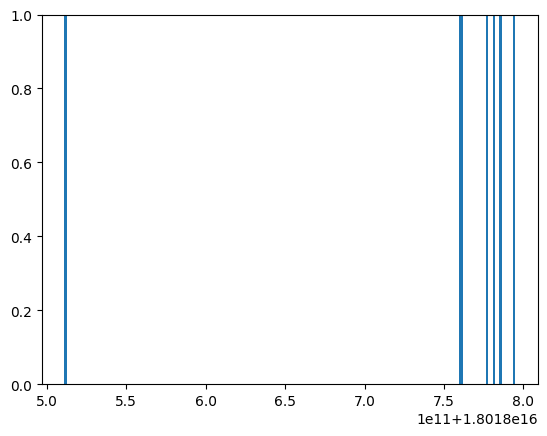

-----------------------------
Lane change file - 6: 


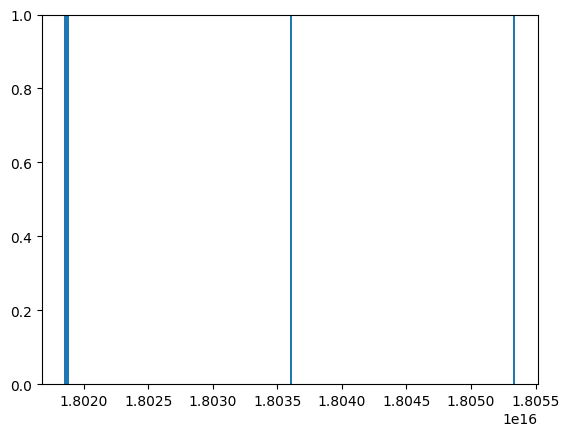

-----------------------------
Lane change file - 7: 


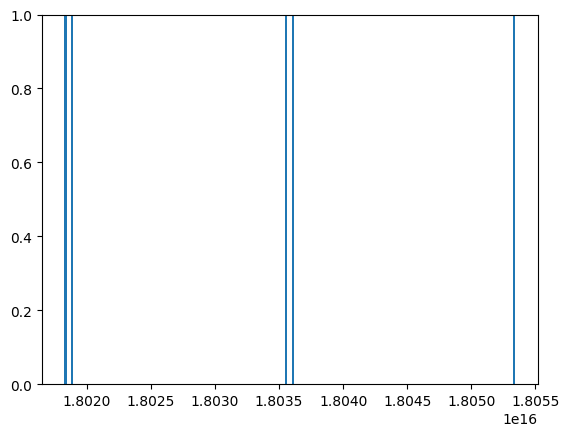

-----------------------------
Lane change file - 8: 


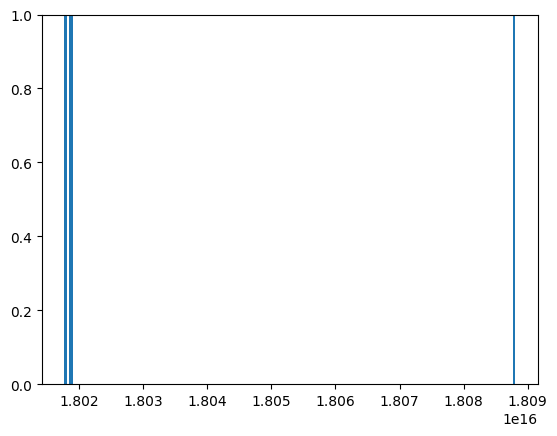

-----------------------------
Lane change file - 9: 


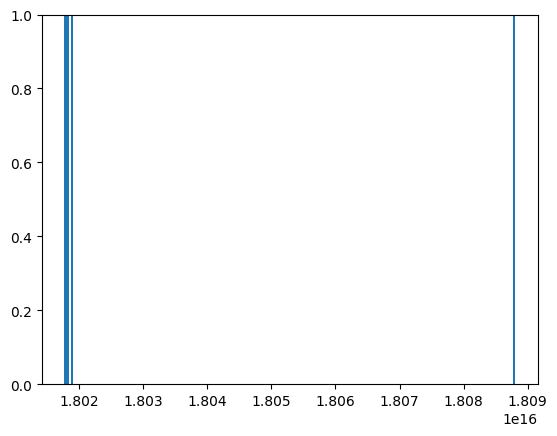

-----------------------------
Lane change file - 1: 


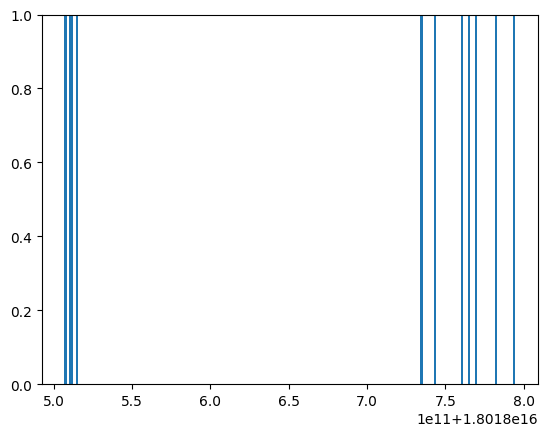

-----------------------------
Lane change file - 2: 


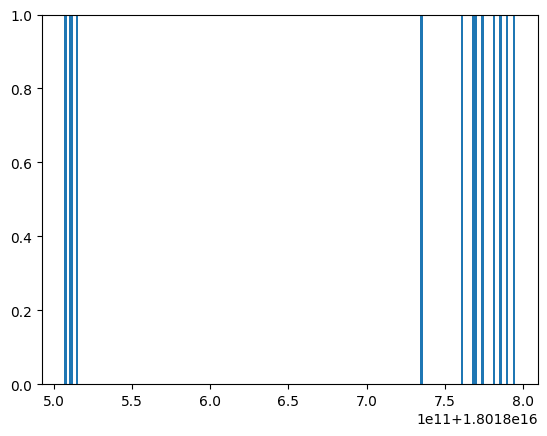

-----------------------------
Lane change file - 3: 


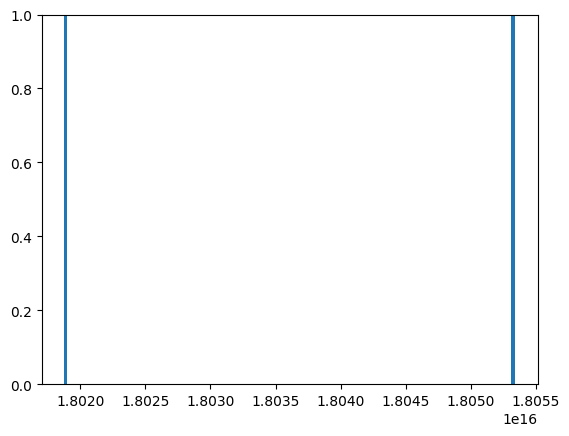

-----------------------------
Lane change file - 4: 


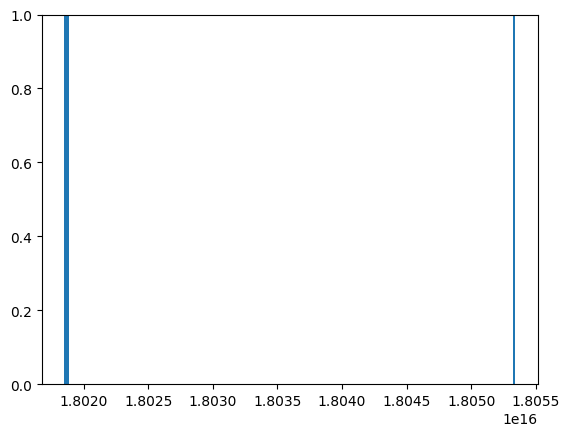

-----------------------------
Lane change file - 5: 


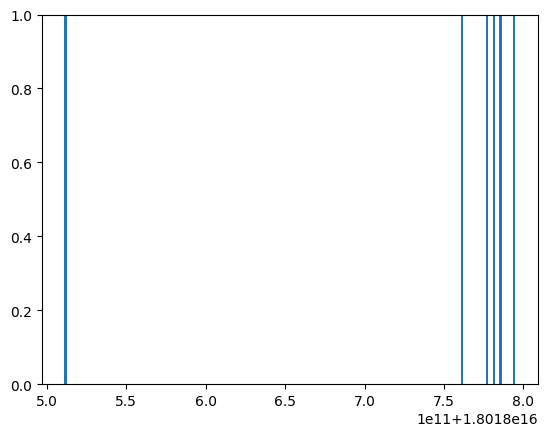

-----------------------------
Lane change file - 6: 


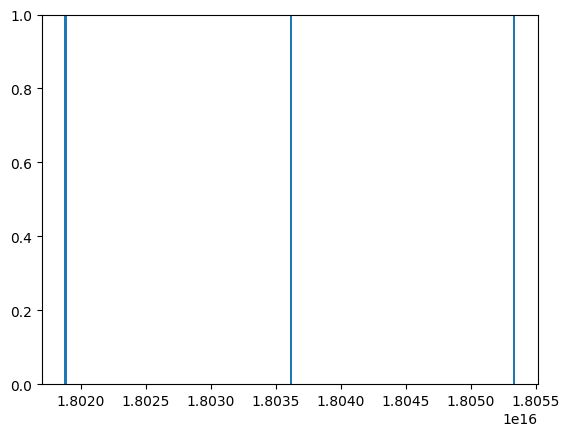

-----------------------------
Lane change file - 7: 


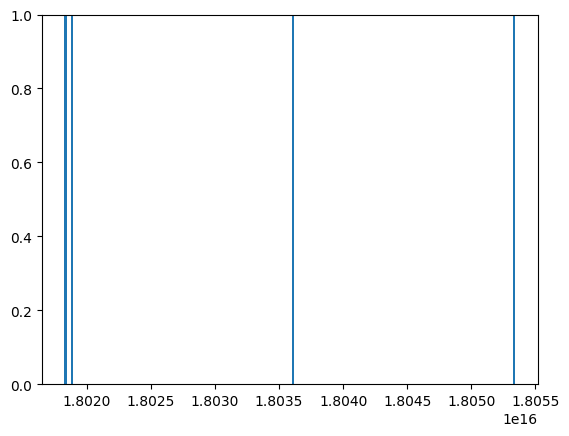

-----------------------------
Lane change file - 8: 


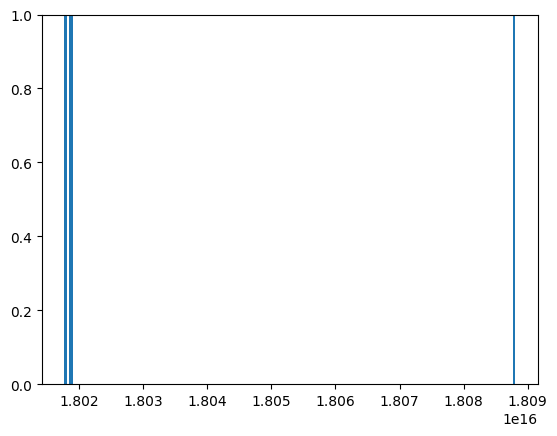

-----------------------------
Lane change file - 9: 


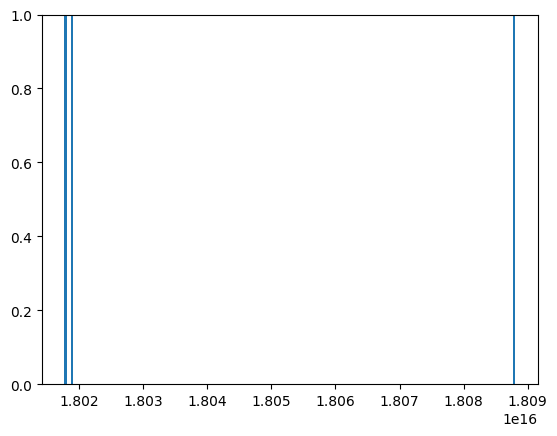

-----------------------------


In [15]:
lcCounter = 1 # used to track which lane change the CSP corresponds to.

print("FIRST SET IS 20HZ, SECOND SET IS 10HZ, THIRD SET IS 5 HZ ")

plt.show()



for laneChanges in laneChangeDfs:
    lcCounter = 1
    print("================================================================")
    print("================================================================")
    for df in laneChanges:
        print("Lane change file - " + str(lcCounter) + ": ")

        min = df['morton'].min()
        max = df['morton'].max()
        max = 30000000000

        plt.hist(df['morton'], bins=200)
        #plt.xlim(0,max)
        plt.ylim(0,1)
        plt.show()

        print("-----------------------------")

        lcCounter += 1